In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.precision', 3)

# default using seabron style
%matplotlib inline
plt.style.use('seaborn')

## Dataset
Illustrate line plots using stock data using pandas_datareader. Note yahoo finance API is not accurate or reliable, we use it for demonstration ONLY

In [2]:
# iris data
iris = sns.load_dataset('iris')
iris.sample(6)

# tip data
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips.tip / tips.total_bill * 100
tips.sample(6)

,sepal_length,sepal_width,petal_length,petal_width,species
76,6.8,2.8,4.8,1.4,versicolor
15,5.7,4.4,1.5,0.4,setosa
9,4.9,3.1,1.5,0.1,setosa
39,5.1,3.4,1.5,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
118,7.7,2.6,6.9,2.3,virginica


,total_bill,tip,sex,smoker,day,time,size,tip_pct
65,20.08,3.15,Male,No,Sat,Dinner,3,15.687
133,12.26,2.00,Female,No,Thur,Lunch,2,16.313
115,17.31,3.50,Female,No,Sun,Dinner,2,20.220
80,19.44,3.00,Male,Yes,Thur,Lunch,2,15.432
165,24.52,3.48,Male,No,Sun,Dinner,3,14.192
17,16.29,3.71,Male,No,Sun,Dinner,3,22.775


## Subplots
`subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)`

### Basic subplots


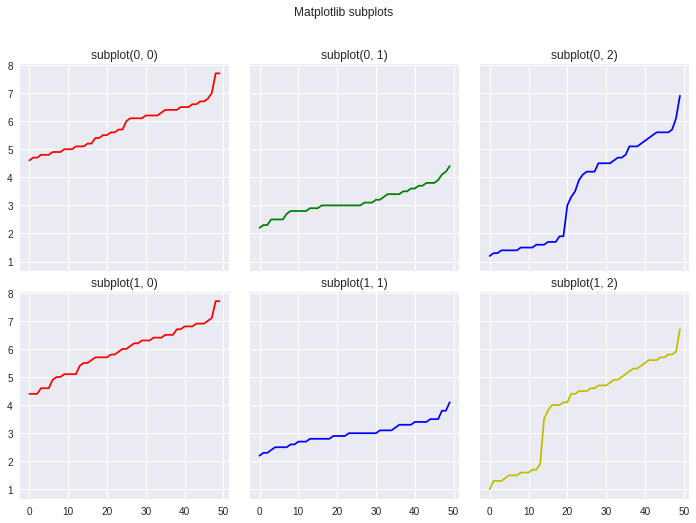

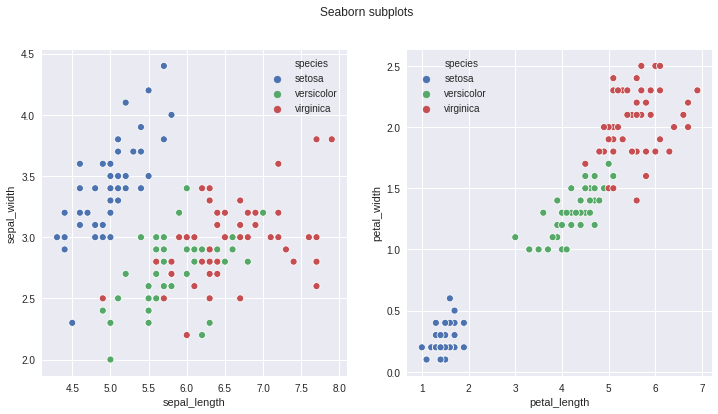

In [3]:
# create 6 subplots
# enable sharex and sharey. no axis inside subplots
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 8), sharex=True, sharey=True, gridspec_kw={'hspace': 0.1, 'wspace': 0.1});
colors = 'rgbcymk'

N = 50
for row in range(rows):
    for col in range(cols):
        _=axes[row, col].plot(iris.iloc[:, col].sample(N).sort_values().values, color=colors[row*col+col]);
        _=axes[row, col].set_title(f"subplot({row}, {col})");
plt.suptitle("Matplotlib subplots")

# subplots + seaborn/pandas
# subplots_adjust spacing
fig, axes = plt.subplots(1, 2, figsize=(12,6));
fig.subplots_adjust(wspace=0.2);
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', ax=axes[0]);
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', ax=axes[1]);
plt.suptitle("Seaborn subplots");

### Custom subplots
- gridspec or subplot2grid
```python
# create custom subplot objects, easier to use
ax1 = plt.subplot2grid(shape, loc, rowspan=1, colspan=1)
# equivalent to
gridspec = plt.GridSpec(shape[0], shape[1])
subplotspec = gridspec.new_subplotspec(loc, rowspan, colspan)
ax2 = plt.subplot(subplotspec)
```

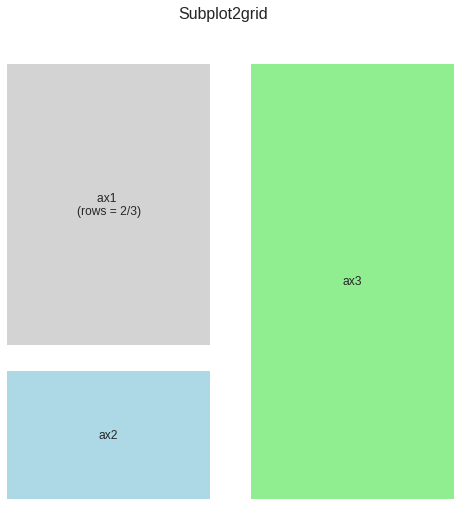

In [4]:
# cread a custom placed subplots
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=2, colspan=1, xticklabels=[], yticklabels=[], xticks=[], yticks=[], fc="lightgrey");
ax2 = plt.subplot2grid((3, 2), (2, 0), rowspan=1, colspan=1, xticklabels=[], yticklabels=[], xticks=[], yticks=[], fc="lightblue");
ax3 = plt.subplot2grid((3, 2), (0, 1), rowspan=3, colspan=1, xticklabels=[], yticklabels=[], xticks=[], yticks=[], fc="lightgreen");
ax1.text(0.5, 0.5, "ax1 \n(rows = 2/3)", fontsize=12, horizontalalignment='center', verticalalignment='center');
ax2.text(0.5, 0.5, "ax2", fontsize=12, horizontalalignment='center', verticalalignment='center');
ax3.text(0.5, 0.5, "ax3", fontsize=12, horizontalalignment='center', verticalalignment='center');
plt.suptitle("Subplot2grid", fontsize=16);

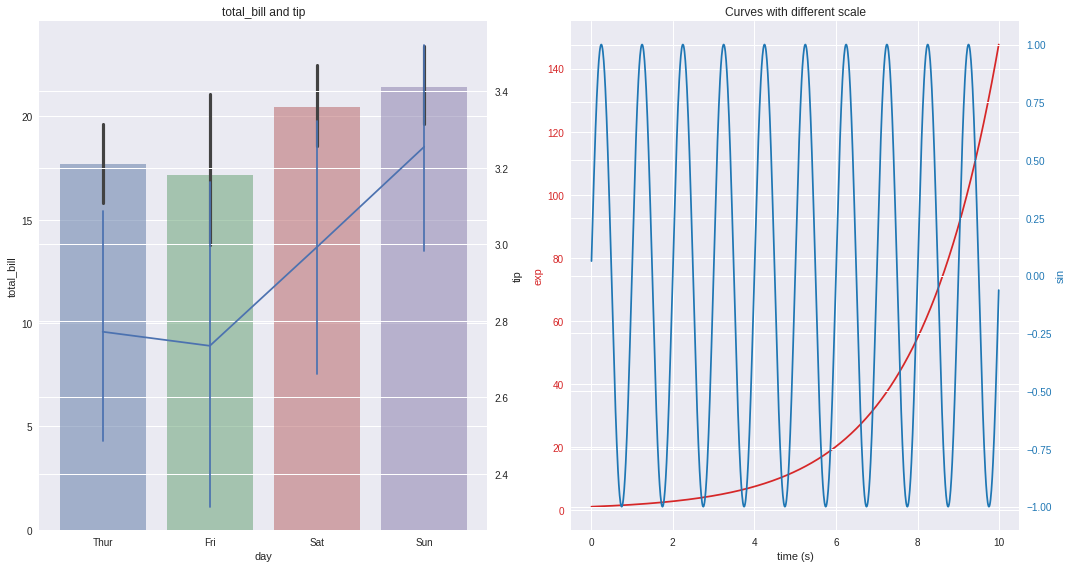

In [5]:
# overlay two plots, duplicate y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(data=tips, x='day', y='total_bill', alpha=0.5, ax=ax1);
ax12 = ax1.twinx();
sns.lineplot(data=tips, x='day', y='tip', err_style='bars', legend='full', ax=ax12);
ax12.set_title('total_bill and tip');

t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t/2)
data2 = np.sin(2*np.pi*t)

color = 'tab:red'
ax2.set_xlabel('time (s)');
ax2.set_ylabel('exp', color=color);
ax2.plot(t, data1, color=color);
ax2.tick_params(axis='y', labelcolor=color);

ax22 = ax2.twinx();  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax22.set_ylabel('sin', color=color);
ax22.plot(t, data2, color=color);
ax22.tick_params(axis='y', labelcolor=color);
ax22.set_title('Curves with different scale')
fig.tight_layout();  # otherwise the right y-label is slightly clipped